## REDES NEURAIS ARTIFICIAIS 

**Multilayer Perceptron Aplicada ao Problema XOR**

**Instituto Federal de Minas Gerais** 

*Engenharia de Computação*

Aluno: Gabriel Henrique Silva Duque

In [1]:
#importção de bibliotecas
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#secante hiperbólica ao quadrado (inversa da tangente hiperbólica)
def sech2(u):
    return 1 - np.tanh(u)**2

In [ ]:
#gerando o dataset 
x = np.array([[0,0],[0,1],[1,0],[1,1]]) #corresponde as entradas i2 i3 (x1,x2)
y = np.array([[-1,1],[1,-1],[1,-1],[-1,1]]) #corresponde as saídas i9 i10 (y1,y2)
print(x,"\n")
print(y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]] 

[[-1  1]
 [ 1 -1]
 [ 1 -1]
 [-1  1]]


In [5]:
#criar os bias 
i1 = 1
i4 = 1
i5 = 1
i8 = 1

In [6]:
#incialização dos pesos wij
w61 = np.random.uniform() - 0.5 
w62 = np.random.uniform() - 0.5
w63 = np.random.uniform() - 0.5
w72 = np.random.uniform() - 0.5
w73 = np.random.uniform() - 0.5
w74 = np.random.uniform() - 0.5
w95 = np.random.uniform() - 0.5
w96 = np.random.uniform() - 0.5
w97 = np.random.uniform() - 0.5
w106 = np.random.uniform() - 0.5
w107 = np.random.uniform() - 0.5
w108 = np.random.uniform() - 0.5

In [8]:
#definicao de parametros 
contador_epocas = 0 
tol = 0 
erro_epoca_atual = tol + 1 
n_amostras = 4
max_epocas = 10000
eta = 0.01
erro_epocas = np.zeros(max_epocas)

In [12]:
#treinamento da MLP
while (contador_epocas < max_epocas) and (erro_epoca_atual > tol):
    #exibe progresso a cada dez epocas
    if contador_epocas % 10 ==0:
        print(f"Época: {contador_epocas}, Erro da época anterior: {erro_epoca_atual}")

    #reseta o erro acumulado da epoca
    erro = 0 

    #embaralha indices para apresentação aleatoria das amostras 
    indices_embaralhados = np.random.permutation(n_amostras)

    for i in range(n_amostras):
        #seleciona um indice
        indice = indices_embaralhados[i]
        indice_selecionado = indices_embaralhados[i]

        #obter o conjunto de entradas x e sua respectiva saída y
        xi = x[indice_selecionado]
        yi = y[indice_selecionado]

        #separa componentes da entrada 
        i2 = xi[0]
        i3 = xi[1]

        #separa componentes da saida
        y9 = yi[0]
        y10 = yi[1]

        #FASE FORWARD
        #calcula ativaçao do neuronio 1 da camada 1
        u6 = i1*w61 + i2*w62 + i3*w63
        i6 = np.tanh(u6)

        #calcula ativaçao do neuronio 2 da camada 1
        u7 = i2*w72 + i3*w73 + i4*w74
        i7 = np.tanh(u7)

        #calcula ativaçao do neuronio 1 da camada 2
        u9 = i5*w95 + i6*w96 + i7*w97
        i9 = np.tanh(u9)

        #calcula ativaçao do neuronio 2 da camada 2
        u10 = i6*w106 + i7*w107 + i8*w108
        i10 = np.tanh(u10)

        #FASE BACKPROPAGATION
        #calula o erro na saída
        e9 = y9 - i9
        e10 = y10 - i10

        #atualização de pesos da camada 2
        #pesos ligados ao neuronio 1 da camada 2 
        #calcula o gradiente do neuronio 1 da camada 2
        deltinha9 = e9 * sech2(u9)

        #calcula ajustes dos pesos do neuronio 1 da camada 2
        deltaw95 = eta * deltinha9 * i5
        deltaw96 = eta * deltinha9 * i6
        deltaw97 = eta * deltinha9 * i7

        #atualização dos pesos do neuronio 1 da camada 2
        w95 += deltaw95
        w96 += deltaw96
        w97 += deltaw97

        #atualização de pesos ligados ao neuronio 2 da camada 2
        #calcula o gradiente do neuronio 2 da camada 2
        deltinha10 = e10 * sech2(u10)

        #calcula ajustes dos pesos do neuronio 2 da camada 2
        deltaw106 = eta * deltinha10 * i6
        deltaw107 = eta * deltinha10 * i7
        deltaw108 = eta * deltinha10 * i8

        #atualização dos pesos do neuronio 2 da camada 2 
        w106 += deltaw106
        w107 += deltaw107
        w108 += deltaw108

        #neuronio 1 da camada 1 
        #pesos ligados ao neuronio 1 da camada 1 
        #calcula o gradiente do neuronio 1 da camada 1
        deltinha6 = (sech2(u6) * (deltinha9*w96 + deltinha10*w106))

        #calcula ajustes dos pesos do neuronio 1 da camada 1 
        deltaw61 = eta * deltinha6 * i1
        deltaw62 = eta * deltinha6 * i2
        deltaw63 = eta * deltinha6 * i3 

        #atualiza os pesos do neuronio 1 da camada 1 
        w61 += deltaw61
        w62 += deltaw62
        w63 += deltaw63

        #neuronio 2 da camada 1
        #pesos ligados ao neuronio 2 da camada 1
        #calcula o gradiente do neuronio 2 da camada 1
        deltinha7 = (sech2(u7) * (deltinha9*w97 + deltinha10*w107)) 

        #calcula ajustes dos pesos do neuronio 2 da camada 1
        deltaw72 = eta * deltinha7 * i2
        deltaw73 = eta * deltinha7 * i3
        deltaw74 = eta * deltinha7 * i4

        #atualiza os pesos do neuronio 2 da camada 1
        w72 += deltaw72
        w73 += deltaw73
        w74 += deltaw74

        #CALCULA O ERRO ACUMULADO
        erro = erro + (np.pow(e9,2) + np.pow(e10,2))

    #calcula o erro da epoca atual
    erro_epoca_atual = erro / n_amostras

    #armazena no historico de erros
    erro_epocas[contador_epocas - 1] = erro_epoca_atual

    #incrementa o contador de epocas
    contador_epocas = contador_epocas + 1

    

     

Época: 0, Erro da época anterior: 1
Época: 10, Erro da época anterior: 2.08448693241578
Época: 20, Erro da época anterior: 2.051963809810225
Época: 30, Erro da época anterior: 2.041401263265532
Época: 40, Erro da época anterior: 2.0374431115072276
Época: 50, Erro da época anterior: 2.0348676408010036
Época: 60, Erro da época anterior: 2.034601477855448
Época: 70, Erro da época anterior: 2.033928536326838
Época: 80, Erro da época anterior: 2.033066013509392
Época: 90, Erro da época anterior: 2.0327722152861316
Época: 100, Erro da época anterior: 2.0320783320201623
Época: 110, Erro da época anterior: 2.03149362882055
Época: 120, Erro da época anterior: 2.0312045863242743
Época: 130, Erro da época anterior: 2.030542940941993
Época: 140, Erro da época anterior: 2.0300028012946534
Época: 150, Erro da época anterior: 2.029866059208211
Época: 160, Erro da época anterior: 2.0294218202112013
Época: 170, Erro da época anterior: 2.0280334771034485
Época: 180, Erro da época anterior: 2.02808171351

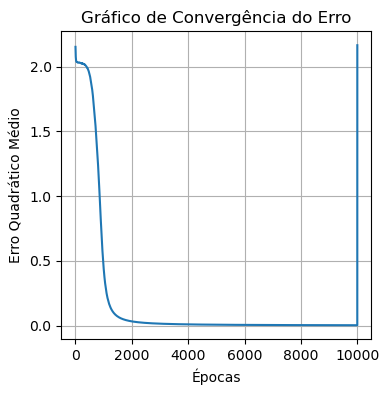

In [13]:
#plota o erro epoca a epoca 
plt.figure(figsize=(4,4))
plt.plot(range(contador_epocas), erro_epocas[:contador_epocas])
plt.title("Gráfico de Convergência do Erro")
plt.xlabel("Épocas")
plt.ylabel("Erro Quadrático Médio")
plt.grid(True)
plt.show()